# Clustering
## K-means, Hierarchical, and More!

#### Mark Llorente 
#### Content "boosted" from Moses Marsh, Jack Bennetto, JF Omhover, Matt Drury

## Objectives

#### Today's objectives: answer the following

* What is the difference between **supervised** and **unsupervised** learning
* What are the steps of the **k-means** clustering algorithm?
* How does one choose the best k? 
  * What is the **elbow method**? **silhouette score**?
* How does the **curse of dimensionality** affect clustering?
* What is the difference between k-means and **hierarchical clustering**?

## Agenda

 * Supervised/unsupervised learning revisited
 * Clustering
 * k-means algorithm
 * How to choose k
 * Curse of dimensionality
 * Hierarchical and other clustering methods
 

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import scipy.stats as scs
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from IPython.display import HTML, display

## Supervised learning


So far we've mostly been doing supervised learning where we try to predict labels and target values.

 * Linear & logistic regression with lasso or ridge regularization
 * Decision trees, bagging, random forest, boosting	
 * kNN

Label == target == endogenous variable == dependent variable == y

## Unsupervised learning

No labels. No target. (No gods. No masters.)

Why use it?

 * EDA
 * Discovering latent variables 
     * _what does this mean?_
 * Feature engineering
 * Preprocessing
 * Autoencoding 
     * for making smaller approximations/representations of the original data as in data compression

### Unsupervised-type questions
- I have a database of clients with their purchase history and I want to draw profiles
- I have the proceedings of the last 2016 data science conference and I want to see the hot topics
- I have obtained usage traces of users on my GUI (clicks, forward/backward, inputs, time spent on each page etc) and I want to understand what different behavior and trajectories they may have
- I have this dataset of gene expressions and I want to extract groups of genes that have mutual influences
- I have this dataset of tweets on the presidential debate and I want my candidate to know which people were tweeting about what


Today we'll talk about ***clustering***, the most commonly used type of unsupervisied learning. Great for EDA, data splitting, and feature generation.

## Clustering Problem

The goal of clustering is to divide the data into **distinct subgroups** such that observations within each group are similar.

![](images/clusters.png)


## Various Algorithms

There are several approachs to clustering, each with variations.

* k-means clustering
* hierarchical clustering
* density-based clustering (DBSCAN)
* distribution-based clustering
* ...

How do we measure how good the clustering is?

## Within-Cluster Sum of Squares

Measures the goodness of a clustering

$$W(C) = \frac{1}{K} \sum_{k=1}^{K} \left( \sum_{x_i, x_j \in C_k} || x_i - x_j ||^2 \right)$$

where $K$ is the number of clusters, $C_k$ is the set of all points with label $k$, and $x_i$ is the position of point $i$.

Do you need to normalize/standardize the data?

# K-means Algorithm

The k-means algorithm involves repeatedly assigning points to clusters and then finding new clusters based on those points.

* Choose a number of clusters k
* Randomly assign each point to a cluster
* Repeat:
    * a\. For each of k clusters, compute cluster *centroid* by taking
mean vector of points in the cluster
    * b\. Assign each data point to cluster for which centroid is closest
(Euclidean)

...until clusters stop changing


# K-means Algorithm

![The k-means algorithm.](images/kmeans.png)




# K-means++

Like many algorithms, it's easy to get caught in a local minimum.

Consider the points below. How would you break them into two clusters?

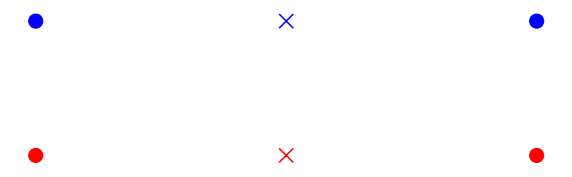

In [59]:
fig, ax = plt.subplots(figsize=(10,3))
colors = 'k'
colors = ['r', 'b', 'r', 'b']
ax.scatter([0, 0, 2, 2], [0, 1, 0, 1], s=200, c=colors)
ax.scatter([1, 1], [0, 1], marker='x', s=200, c=['r', 'b'])
ax.axis('off')
plt.show()

k-means finds a local minimum, and sometimes a bad one.

How would we choose a better starting points?

One alternative to this is to choose centroids based on random points, which will make it likely initial centroids will be farther apart.

k-means++ is an extension of this idea, the same algorithm as k-means but with a different starting point.

 * Choose one point for first center.
 * Repeat:
    
    * Calculate distance from each point to the nearest center $d_i$
    * Choose a point to be the next center, randomly, using a weighed probability $d_i^2$

 ... until k centers have been chosen.

## What's the correct number of clusters?

In [60]:
clusters = [(-2, -3, .75, 100),
            (-5, -5, .75, 75),
            (4, 3, 1.5, 200),
            (1, -3, .5, 150),
            (-1, 0.15, 0.75, 100)]
k = len(clusters)
n = sum([c[3] for c in clusters])

x1 = np.array([])
x2 = np.array([])

for c in clusters:
    x1 = np.concatenate([x1, (scs.norm(c[0], c[2]).rvs(c[3]))])
    x2 = np.concatenate([x2, (scs.norm(c[1], c[2]).rvs(c[3]))])
x = np.stack((x1, x2)).T

(-9, 8)

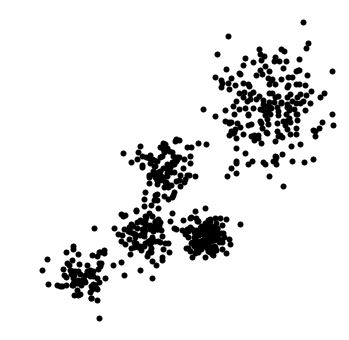

In [61]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis('off')
ax.axis('equal')
ax.scatter(x[:,0], x[:,1], linewidths=0, color='k')
ax.set_xlim(xmin=-9, xmax=8)


How many clusters do you see?

Let's try fitting them with k-means.

In [62]:
km = KMeans(5)
y = km.fit_predict(x)

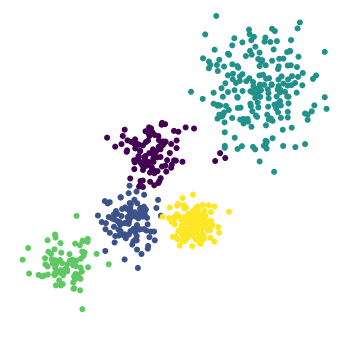

In [63]:
fig, ax = plt.subplots(figsize=(6,6))

ax.axis('off')
ax.axis('equal')
ax.scatter(x[:,0], x[:,1], c=y, linewidths=0)
ax.set_ylim(ymin=-9, ymax=8)
plt.show()

These are basically the clusters we created the data from.

# Choosing K

Can we just use within-cluster sum of squares (WCSS) to choose k?


More clusters $\implies$ lower WCSS.

Several measures for the "best" k - no easy answer

 * The Elbow Method
 * Silhouette Score
 * GAP Statistic

First, let's cluster the data above with k-means with various values of $k$.

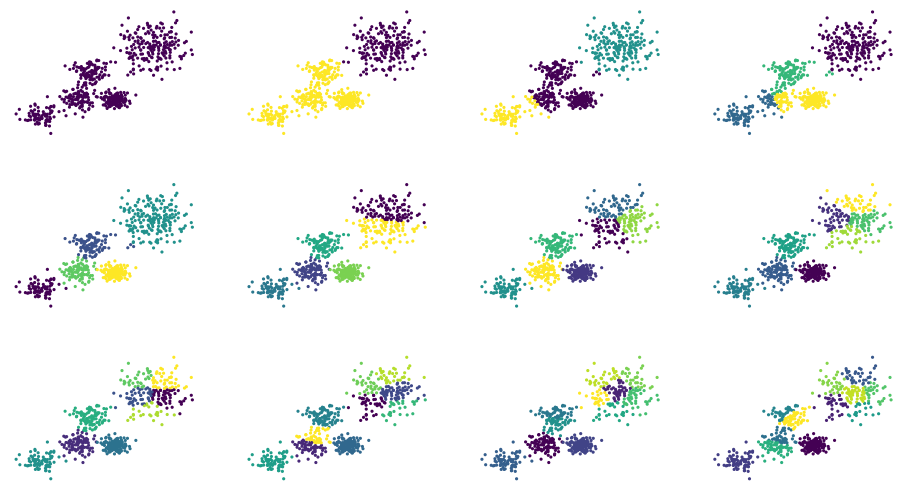

In [64]:
maxk = 13
wcss = np.zeros(maxk)
silhouette = np.zeros(maxk)

fig, axes = plt.subplots(3, 4, figsize=(16,9))

# flatten
axes = [ax for axrow in axes for ax in axrow]

for k, ax in zip(range(1,maxk), axes):
    km = KMeans(k)
    y = km.fit_predict(x)
    ax.axis('off')
    ax.scatter(x[:,0], x[:,1], c=y, linewidths=0, s=10)
    ax.set_ylim(ymin=-9, ymax=8)
    
    
    for c in range(0, k):
        for i1, i2 in itertools.combinations([ i for i in range(len(y)) if y[i] == c ], 2):
            wcss[k] += sum(x[i1] - x[i2])**2
    wcss[k] /= 2
    
    if k > 1:
        silhouette[k] = silhouette_score(x,y)
    

## The Elbow Method

Let's start with the Elbow method. In this, we simply plot the within-cluster sum of squares and try to see what looks like an elbow.

What looks best?

Text(0, 0.5, 'within-cluster sum of squares')

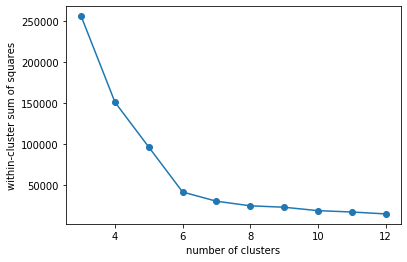

In [65]:
fig, ax = plt.subplots()
ax.plot(range(3,maxk), wcss[3:maxk], 'o-')
ax.set_xlabel("number of clusters")
ax.set_ylabel("within-cluster sum of squares")

This process doesn't always give us an unambiguous choice of k! From experience, there may not be a clear elbow to choose. What we want is some metric we can maximize.

What would that look like?

# Choosing K -- Silhouette Score

For each point $x_i$:

 * $a_i$ is the mean distance between $x_i$ and all other points in the same cluster
 * $b_i$ is the mean distance between $x_i$ and all points in the *nearest* cluster.

$$\text{silhouette}(x_i) = \frac{b_i - a_i}{max(a_i, b_i)} $$

What's the range of silhouette scores?

The silhouette score of a clustering is the average of silhouette score of all points.

Text(0, 0.5, 'silhouette score')

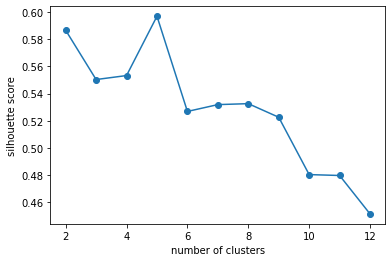

In [66]:
fig, ax = plt.subplots()
ax.plot(range(2,maxk), silhouette[2:maxk], 'o-')
ax.set_xlabel("number of clusters")
ax.set_ylabel("silhouette score")
#ax.set_ylim(ymin=0.0, ymax=1.0)

Possible sillhouette scores:
 * near 1: very small tight cluster.
 * 0: at the edge of two clusters; could be in either.
 * < 0: oops.

The higher the the average silhouette score, the tighter and more separated the clusters.

# Silhouette Graph

A silhouette graph is a representation of the silhouette score of every data point, grouped first by cluster and then by decreasing value.

For n_clusters = 2 The average silhouette_score is : 0.5865967927868118


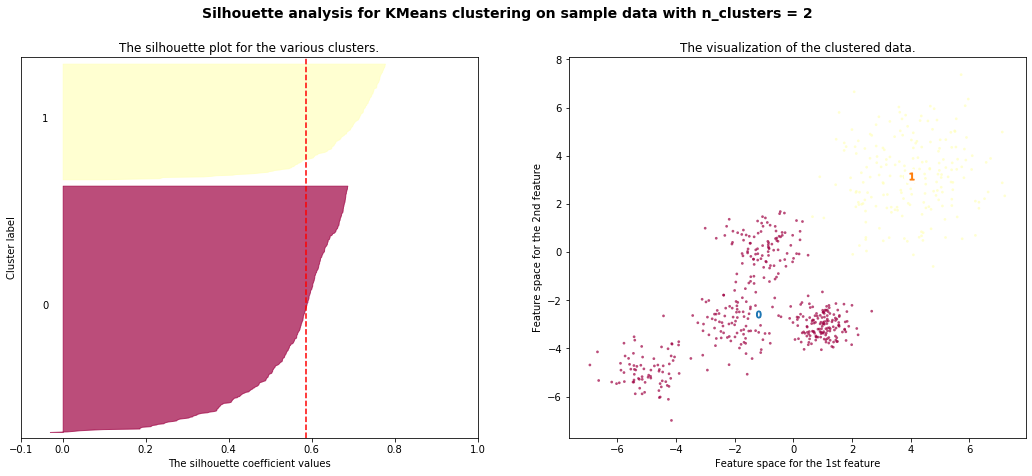

For n_clusters = 3 The average silhouette_score is : 0.550317307319457


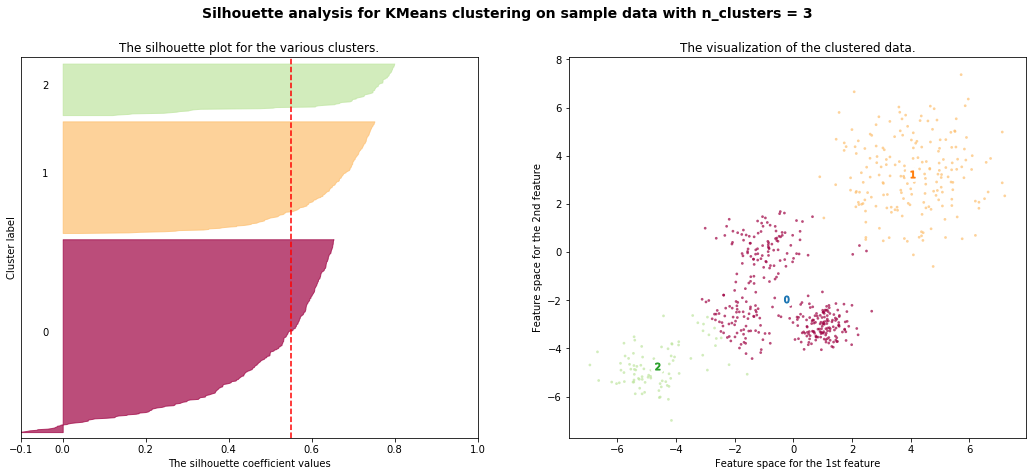

For n_clusters = 4 The average silhouette_score is : 0.5532527936452235


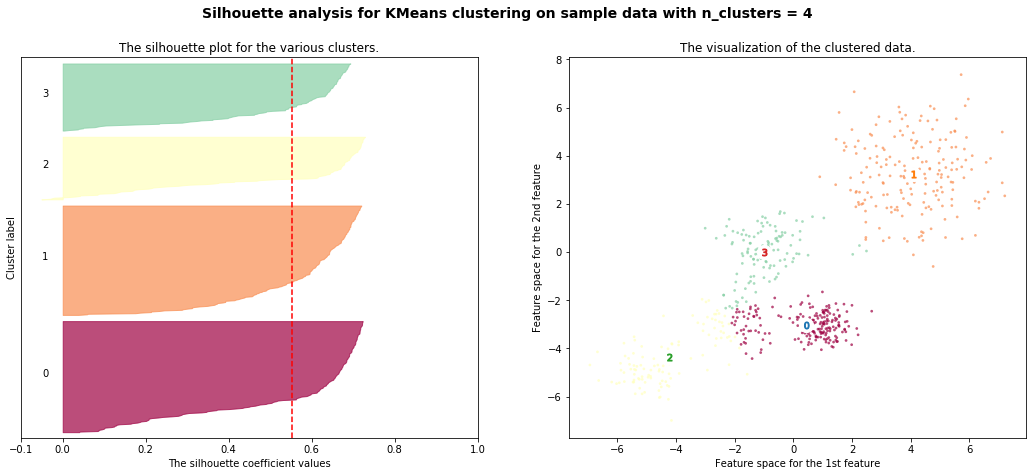

For n_clusters = 5 The average silhouette_score is : 0.5968930285746806


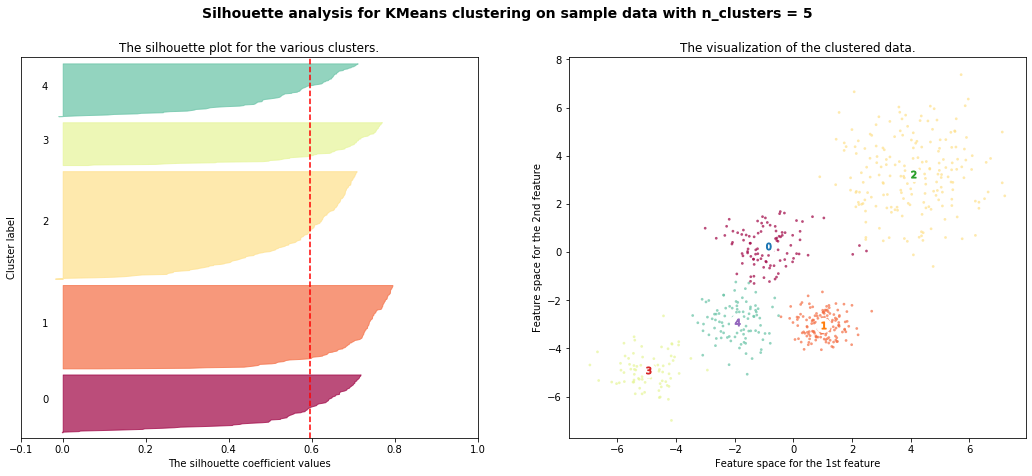

For n_clusters = 6 The average silhouette_score is : 0.5268441295537949


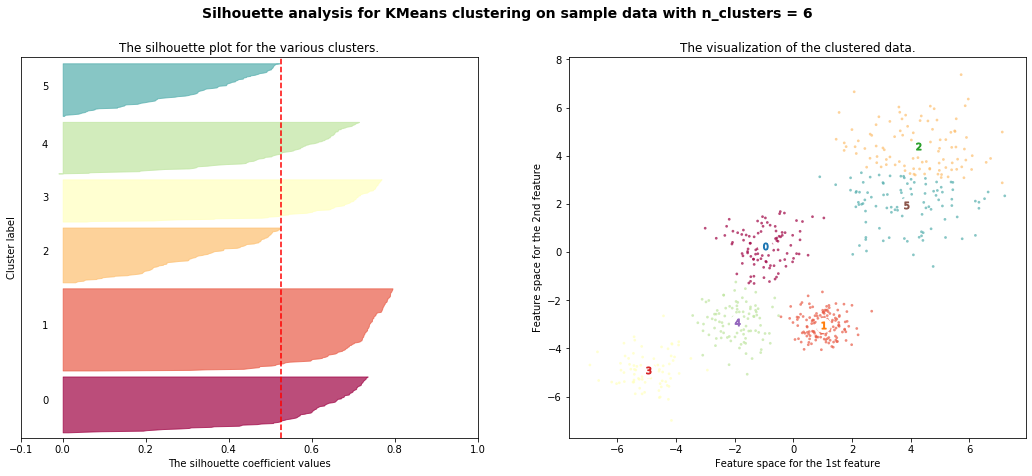

For n_clusters = 7 The average silhouette_score is : 0.5322818021756106


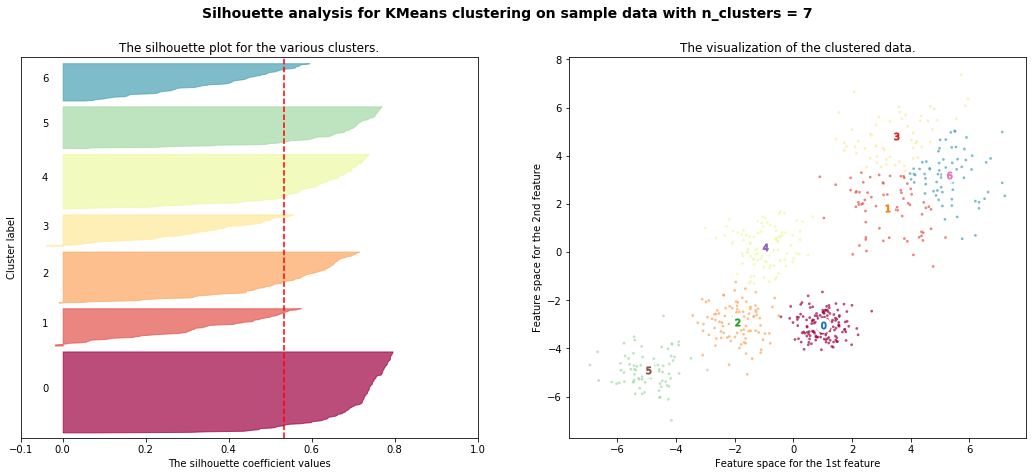

For n_clusters = 8 The average silhouette_score is : 0.5324919283455211


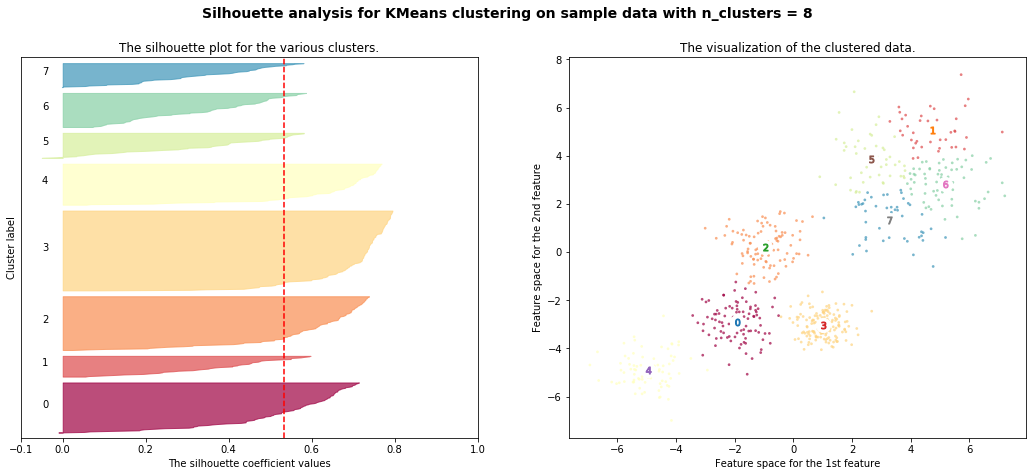

For n_clusters = 9 The average silhouette_score is : 0.5317622092875468


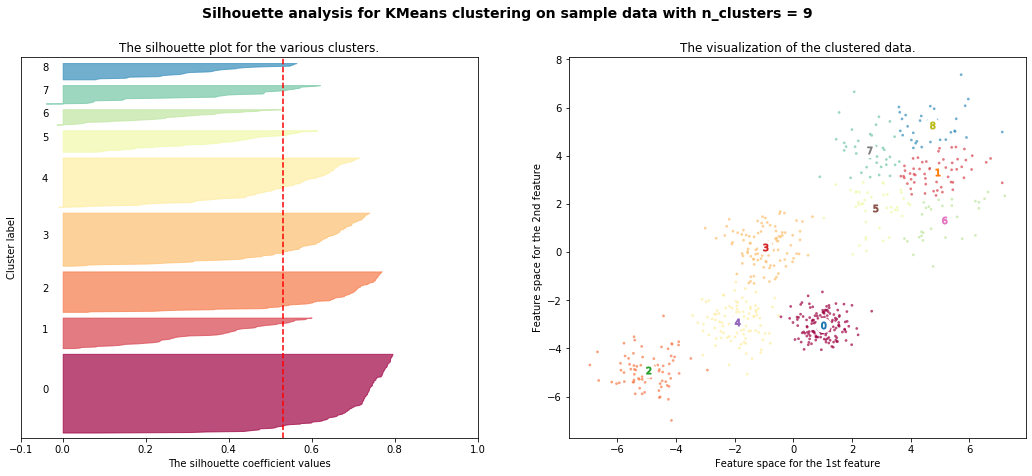

In [67]:
X = x
range_n_clusters = range(2,10)

# taken from sklearn
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap('Spectral')
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed

    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# Hierarchical Clustering

With many clustering methods the goal is to divide the data into a specific number of clusters. With hierarchical clustering we group data points as leaves on a tree, clustering them into larger and larger groups.

How would we group these?

![](images/letters-ungrouped.png)


<table><tr><td><img src='images/letters-grouped.png'></td><td><img src='images/letters-dendrogram.png'></td></tr></table>


# Hierarchical Clustering

The basic algoritm of hierarchical clustering is

 * Assign each point to its own cluster
 * Repeat:

   * Compute distances between clusters
   * Merge closest clusters

 ...until all are merged

Note that we didn't specify the number of clusters beforehand. We build up the clusters *agglomeratively*, then we can choose whatever level of clustering we want afterward.


## How to define distance between clusters: Linkage

It's easy to talk about the distance (or dissimalarity) between two points, but between clusters it's less clear. There are a few different measures used.

* **Single:** Minimum pairwise dissimilarity between points in clusters -- not as good; can lead to long narrow clusters
* **Complete:** Maximum pairwise dissimilarity between points in clusters -- good
* **Average:** Average of pairwise dissimilarity between points in clusters -- also good
* **Ward/Centroid:** Dissimilarity between centroids -- used in genomics; risk of inversions

![](images/linkages.png "Linkages")

![](images/linkage_dendrograms.png "Dendrograms")

### Using Sklearn's Version: AgglomerativeClustering

In [68]:
linkages = ['ward', 'complete', 'average', 'single']
hierarchical_clustering_algorithms = {
    (linkage, n): AgglomerativeClustering(
        n_clusters=n, linkage=linkage)
    for linkage, n in itertools.product(linkages, [2, 4, 5])
}

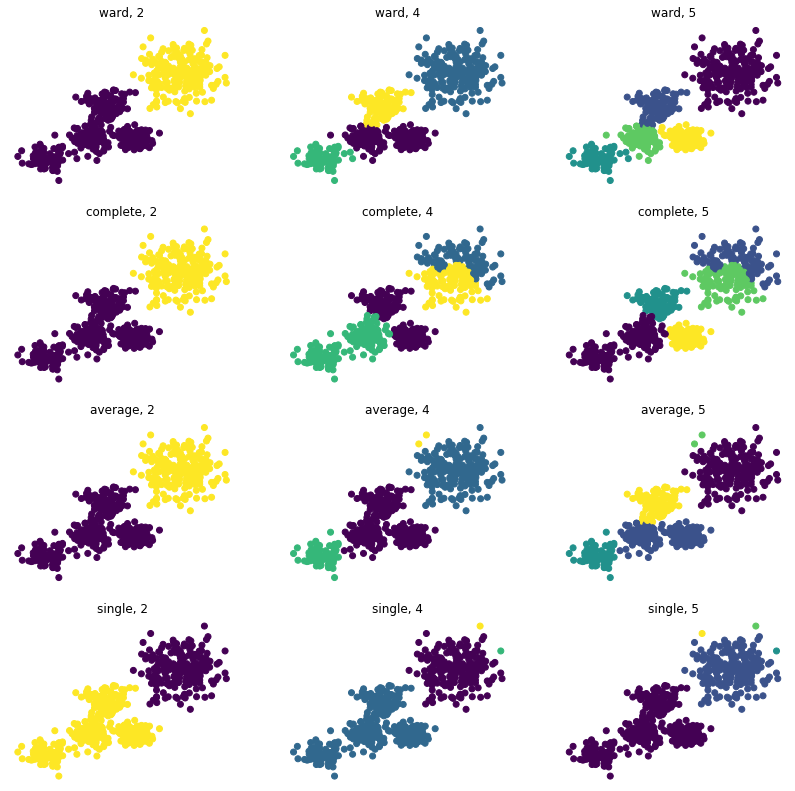

In [69]:
fig, axs = plt.subplots(4, 3, figsize=(14, 14))

for (linkage, n), ax in zip(hierarchical_clustering_algorithms, axs.flatten()):
    clusterer = hierarchical_clustering_algorithms[(linkage, n)]
    clusterer.fit(x)
    labels = clusterer.labels_
    ax.axis('off')
    ax.scatter(x[:, 0], x[:, 1], c=labels)
    ax.set_title(f"{linkage}, {n}")

## Hot Tip for Morning Sprint:
### The accompanying notebook, `scipy_dendrogram_example_whiskey.ipynb`, has example code for using scipy's dendrogram function and other distance metric related tools!

# Limitations of K-Means and other methods

Are the kinds of clusters k-means can produce appropriate for the data? Can it map well to 

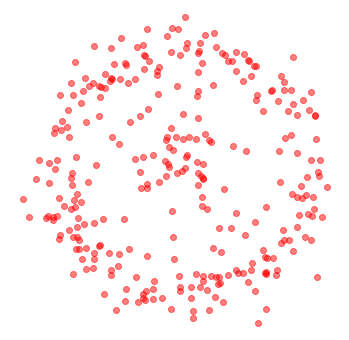

In [70]:
fig, ax = plt.subplots(figsize=(6,6))
r = np.concatenate([scs.norm(7,1).rvs(250),
                    scs.norm(2,1).rvs(50)])
a = scs.uniform(0, 6.28).rvs(300)
x = r * np.cos(a)
y = r * np.sin(a)

ax.axis('equal')
ax.axis('off')
ax.scatter(x, y, color="r", alpha=0.5)

What will k-means do here?

# DBSCAN

With DBSCAN (Density-Based Spacial Clustering of Applications with Noise) we don't specify the number of clusters. Instead we specify:

 * $\epsilon$: distance between points for them to be connected
 * minPts: number of connected points for a point to be a "core" point

A cluster is all connected core points, plus others within $\epsilon$ of one of those. Other points are noise.

Let's tackle the above problem with DBSCAN.

## Other clustering methods

![The k-means algorithm.](images/cluster_comparison.png "k-means")

Source: http://scikit-learn.org/stable/modules/clustering.html

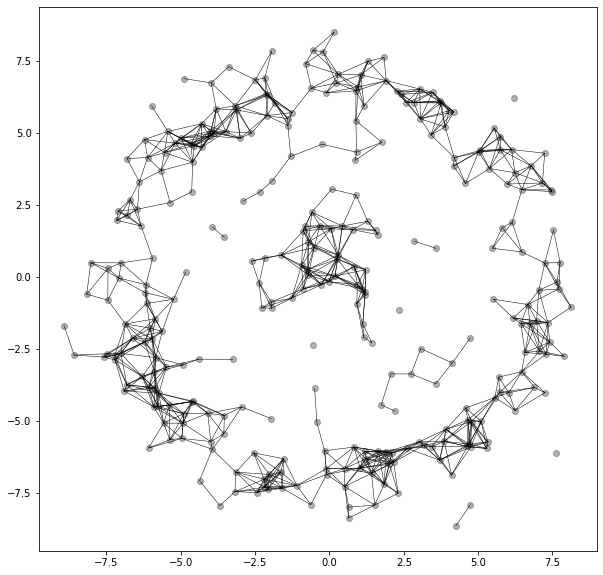

In [75]:
epsilon = 1.2
minpts = 400

fig, ax = plt.subplots(figsize=(10,10))

distances = squareform(pdist(np.stack([x,y], axis=1)))
connected = distances < epsilon
ax.scatter(x, y, color="k", alpha=0.3)
for i in range(len(x)):
    for j in range(i):
        if connected[i,j]:
            ax.plot([x[i], x[j]], [y[i], y[j]], 'k', lw=0.5)

coreindices = np.where(connected.sum(axis=0) > (minpts))[0]
ax.scatter(x[coreindices], y[coreindices], s=150, c='r')

for i in coreindices:
    for j in coreindices:
        if i > j and connected[i,j]:
            ax.plot([x[i], x[j]], [y[i], y[j]], 'k', lw=1.2)

# The Curse of Dimensionality

Random variation in extra dimensions can many hide significant differences between clusters.

The more dimensions there are, the worse the problem.

In [48]:
# import function to plot histograms on top of each other cleanly
from multihist import multihist

Consider two clusters plotted in increasing numbers of dimensions. How much do they overlap?

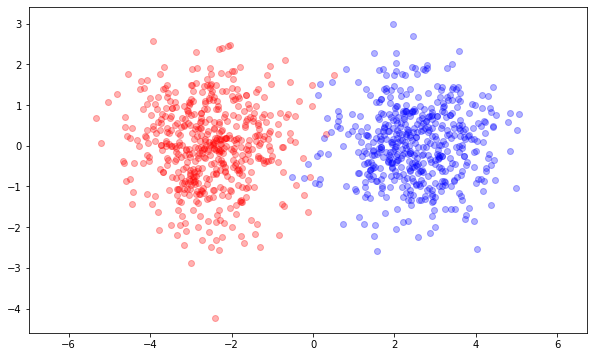

In [49]:
count = 500
sep = 5.

x = np.zeros((2, 2*count))
x[0,:] = np.concatenate((scs.norm(-sep/2., 1).rvs(count), (scs.norm(sep/2., 1).rvs(count))))
x[1, :] = scs.norm(0, 1).rvs(2*count)
fig, ax = plt.subplots(figsize=(10,6))
ax.axis('equal')
ax.scatter(x[0, :count], x[1, :count], c='r', alpha=0.3)
ax.scatter(x[0, count:], x[1, count:], c='b', alpha=0.3)
plt.show()

In [51]:
x.shape

(2, 1000)

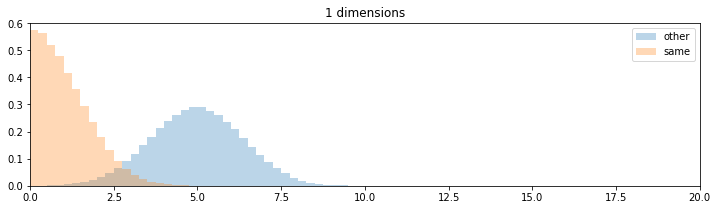

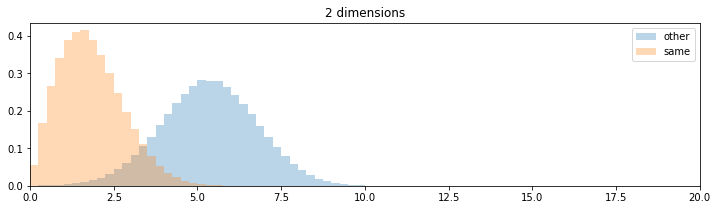

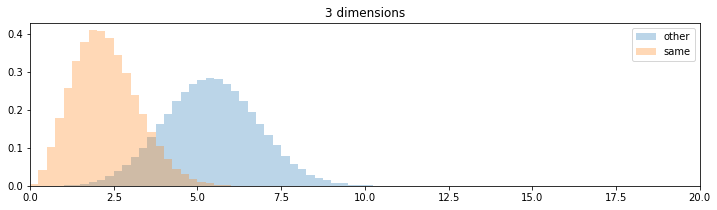

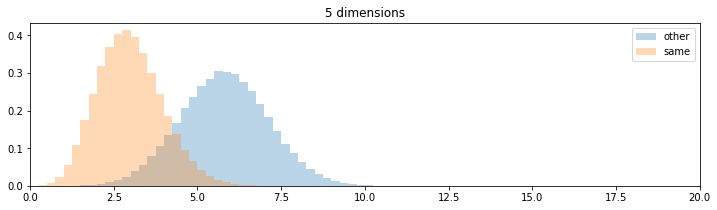

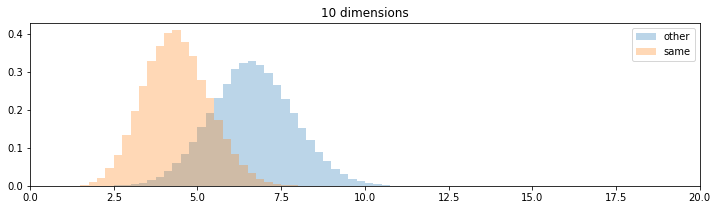

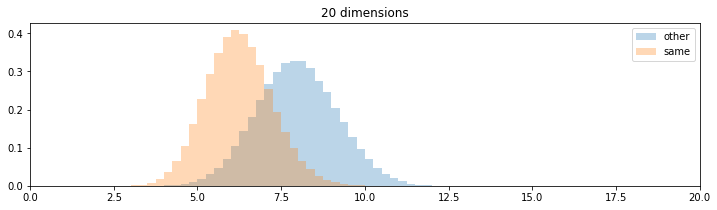

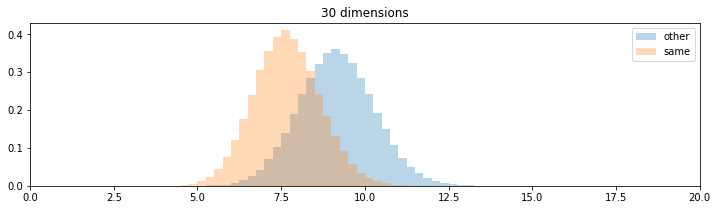

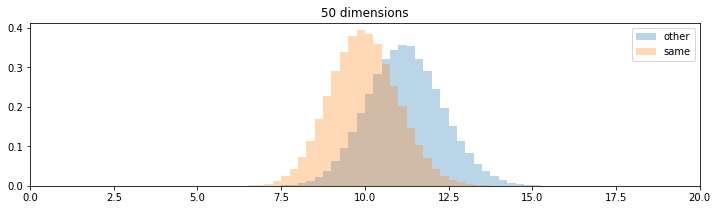

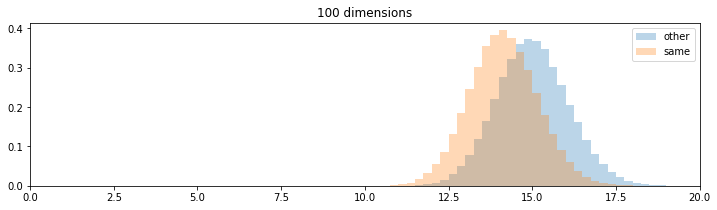

In [23]:
for dims in [1, 2, 3, 5, 10, 20, 30, 50, 100]:
    x = np.zeros((dims, 2*count))
    x[0,:] = np.concatenate((scs.norm(-sep/2., 1).rvs(count), (scs.norm(sep/2., 1).rvs(count))))
    for d in range(1, dims):
        x[d, :] = scs.norm(0, 1).rvs(2*count)

    clusterlabels = ["cluster 1"] * count + ["cluster 2"] * count 
    
    y = []
    dist = []
    for i in range(2*count):
        for j in range(i+1, 2*count):
            d = np.sqrt(sum((x[:,i] - x[:, j])**2))
            dist.append(d)
            y.append("same" if i // count == j // count else "other")
    multihist(np.array(dist), np.array(y), binsize=0.25, figsize=(12,3),
                   xmin=0, xmax=20, title="{0} dimensions".format(dims))
    #plt.axes(frameon=False)

    plt.show()

## But...
That assumes additional dimensions add nothing. What if each additional dimension adds an equal amount of signal?

/Users/skylarenglish/galvanize/lectures-RFT4/clustering/multihist.py:64: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  normed=normed, label=str(yval), color=color)


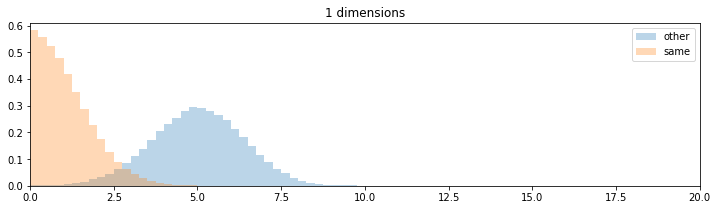

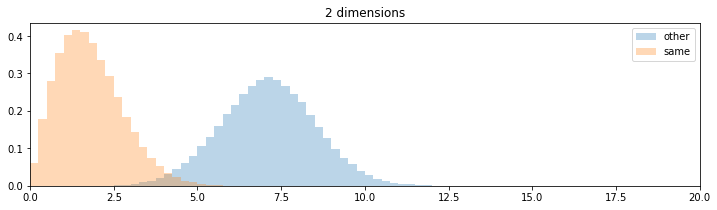

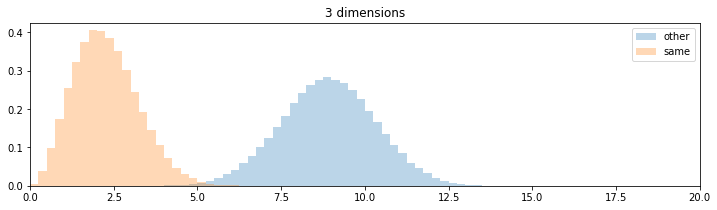

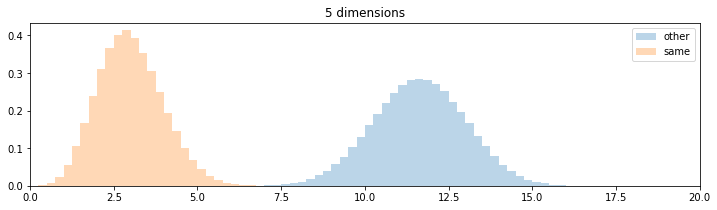

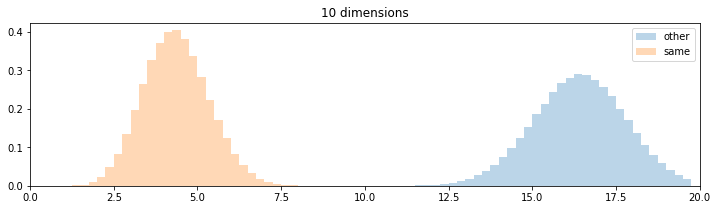

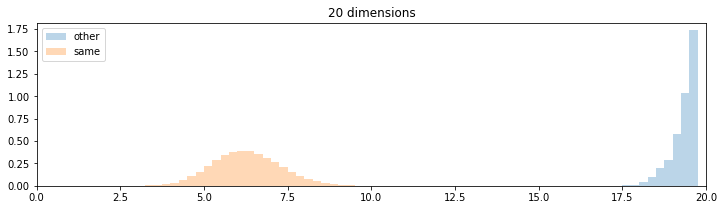

/Users/skylarenglish/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


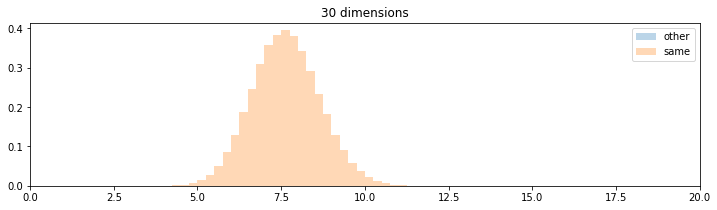

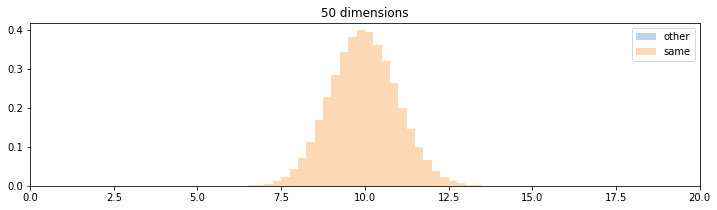

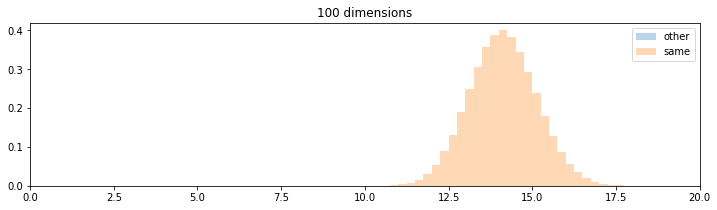

In [52]:
for dims in [1, 2, 3, 5, 10, 20, 30, 50, 100]:
    
    x = np.zeros((dims, 2*count))
    for d in range(0, dims):
        x[d,:] = np.concatenate((scs.norm(-sep/2., 1).rvs(count), (scs.norm(sep/2., 1).rvs(count))))

    clusterlabels = ["cluster 1"] * count + ["cluster 2"] * count 
    
    y = []
    dist = []
    for i in range(2*count):
        for j in range(i+1, 2*count):
            d = np.sqrt(sum((x[:,i] - x[:, j])**2))
            dist.append(d)
            y.append("same" if i // count == j // count else "other")
    multihist(np.array(dist), np.array(y), binsize=0.25, figsize=(12,3),
                   xmin=0, xmax=20, title="{0} dimensions".format(dims))
    #plt.axes(frameon=False)

    plt.show()

## ...except
Assume that each new dimension has an exponentially decreasing amount of signal.

Here additional dimension helps, but only up to a point. Later dimensions that are almost all noise make things worse.

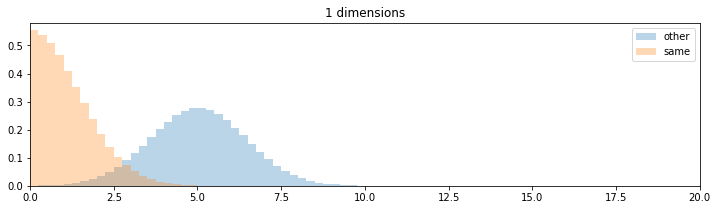

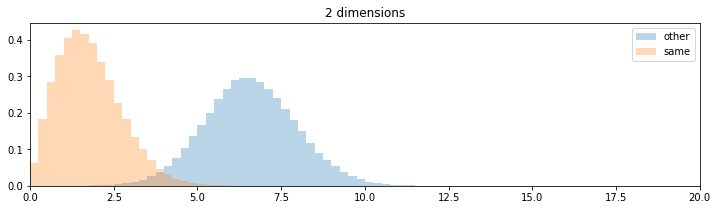

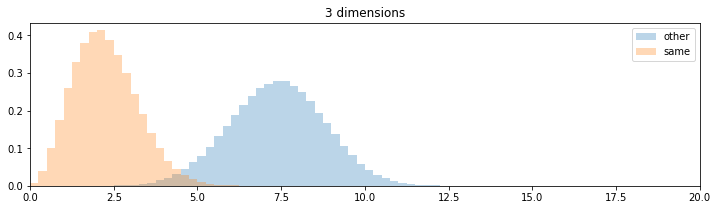

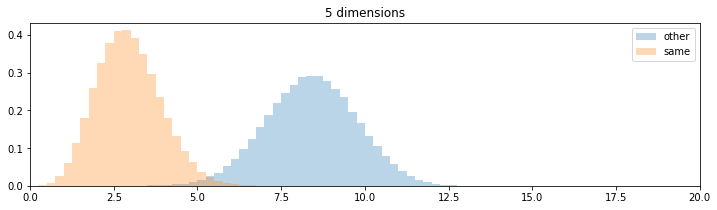

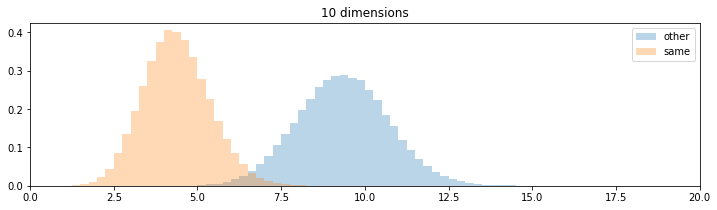

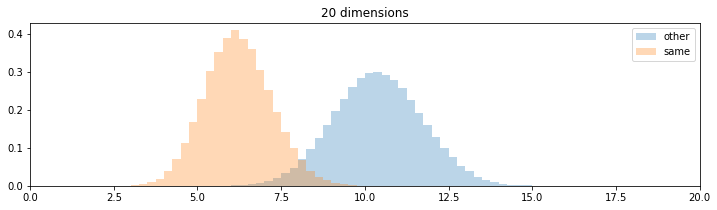

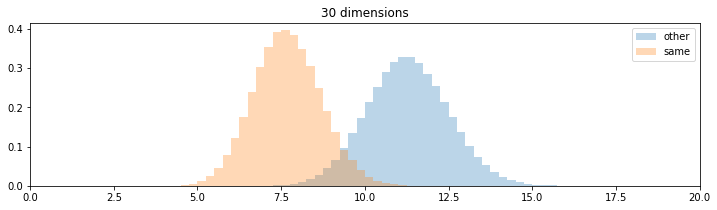

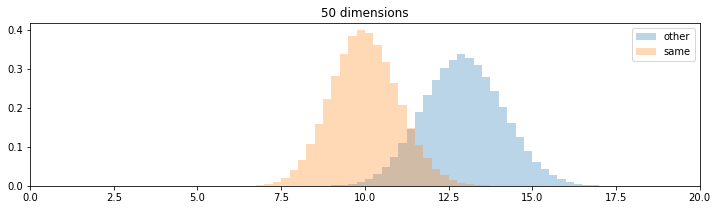

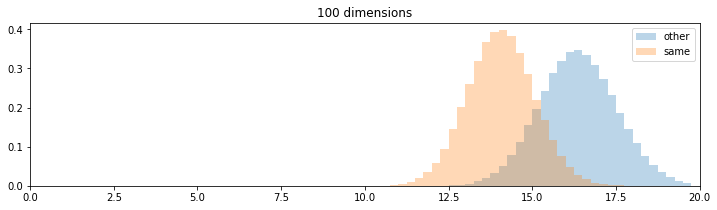

In [25]:
for dims in [1, 2, 3, 5, 10, 20, 30, 50, 100]:
    
    x = np.zeros((dims, 2*count))
    for d in range(0, dims):
        x[d,:] = np.concatenate((scs.norm(-sep/2.*(.8**d), 1).rvs(count), (scs.norm(sep/2.*(.8**d), 1).rvs(count))))
    
    clusterlabels = ["cluster 1"] * count + ["cluster 2"] * count 
    
    y = []
    dist = []
    for i in range(2*count):
        for j in range(i+1, 2*count):
            d = np.sqrt(sum((x[:,i] - x[:, j])**2))
            dist.append(d)
            y.append("same" if i // count == j // count else "other")
    multihist(np.array(dist), np.array(y), binsize=0.25, figsize=(12,3),
                   xmin=0, xmax=20, title="{0} dimensions".format(dims))
    #plt.axes(frameon=False)

    plt.show()

From [The Elements of Statistical Learning]()

> Although simple generic prescriptions for choosing the individual attribute dissimilarities [...] can be comforting, there is no substitute for careful thought in the context of each individual problem.  **Specifying an appropriate dissimilarity measure is far more important in obtaining success with clustering than the choice of clustering algorithm**

# Optional Content: Distribution-based clustering

With distribution-based clustering we assume some fixed number of clusters, and assume they follow some (often normal) distribution. We then try to find the parameters that have the **maximum likelihood** of producing these data.

This is more difficult then other problems we've seen because we don't know which point came from which distribution. We need to add some hidden variables to the problem: the probability each point came from each distribution. We can solve this by an **expectation-maximization** (EM) algorithm in which we alternate between expectation steps (where we calculate the hidden variables) and maximization steps (in which we calculate the maximum-likelihood parameters assuming the hidden variables are correct).

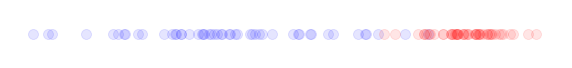

In [26]:
npts = 100
actual_mus = 1, 5
actual_sds = 1.5, 0.5 
x = np.concatenate([scs.norm(actual_mus[0], actual_sds[0]).rvs(npts//2),
                    scs.norm(actual_mus[1] ,actual_sds[1]).rvs(npts//2)])
y = np.ones(npts)/2.
fig, ax = plt.subplots(figsize=(10,1))
ax.scatter(x[:npts//2], y[:npts//2], c='b', alpha=0.1, s=100)
ax.scatter(x[npts//2:], y[npts//2:], c='r', alpha=0.1, s=100)
ax.axis('off')
plt.show()

In [27]:
mus = [-1, 0]
sds = [1, 1]
dists = [scs.norm(mu, sd) for mu, sd in zip(mus, sds)]
actual_dists = [scs.norm(mu, sd) for mu, sd in zip(actual_mus, actual_sds)]

      actual  estimate
mu_0  1.00    -1.000
mu_1  5.00    0.000
sd_0  1.50    1.000
sd_1  0.50    1.000


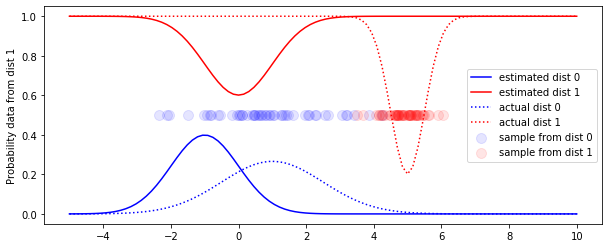

In [28]:
def plot_em(x, y, dists, actual_dists):
    xpts = np.linspace(-5,10,100)
    fig, ax = plt.subplots(figsize=(10,4))
    npts = len(x)
    ax.scatter(x[:npts//2], y[:npts//2], c='b', alpha=0.1, s=100, label="sample from dist 0")
    ax.scatter(x[npts//2:], y[npts//2:], c='r', alpha=0.1, s=100, label="sample from dist 1")
    ax.plot(xpts, dists[0].pdf(xpts), 'b', label="estimated dist 0")
    ax.plot(xpts, 1-dists[1].pdf(xpts), 'r',  label="estimated dist 1")
    ax.plot(xpts, actual_dists[0].pdf(xpts), 'b:',  label="actual dist 0")
    ax.plot(xpts, 1-actual_dists[1].pdf(xpts), 'r:',  label="actual dist 1")
    ax.set_ylabel("Probability data from dist 1")
    ax.legend()

def print_stats(actual_mus, actual_sds, mus, sds):
    #for i in (0, 1):
    print("      actual  estimate")
    print("mu_0  {0:.2f}    {1:.3f}".format(actual_mus[0], mus[0]))
    print("mu_1  {0:.2f}    {1:.3f}".format(actual_mus[1], mus[1]))
    print("sd_0  {0:.2f}    {1:.3f}".format(actual_sds[0], sds[0]))
    print("sd_1  {0:.2f}    {1:.3f}".format(actual_sds[1], sds[1]))

plot_em(x, y, dists, actual_dists)
print_stats(actual_mus, actual_sds, mus, sds)

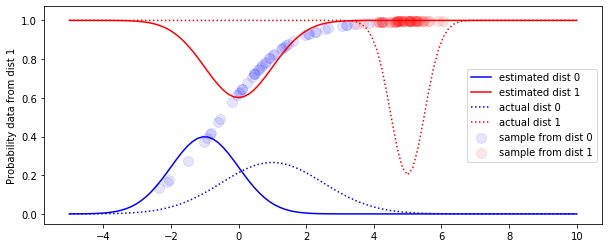

In [29]:
y = dists[1].pdf(x) / (dists[0].pdf(x) + dists[1].pdf(x))

plot_em(x, y, dists, actual_dists)

      actual  estimate
mu_0  1.00    -0.246
mu_1  5.00    3.370
sd_0  1.50    0.872
sd_1  0.50    1.750


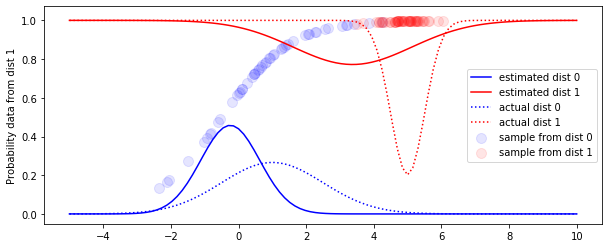

In [30]:
def weighted_stats(x, weights):
    wtotal = weights.sum()
    wmean = (x * weights).sum() / wtotal
    wsd = (((weights*(x - wmean))**2).sum() / wtotal)**0.5
    return wmean, wsd

mus[0], sds[0] = weighted_stats(x, 1-y)
mus[1], sds[1] = weighted_stats(x, y)
dists = [scs.norm(mu, sd) for mu, sd in zip(mus, sds)]

plot_em(x, y, dists, actual_dists)
print_stats(actual_mus, actual_sds, mus, sds)

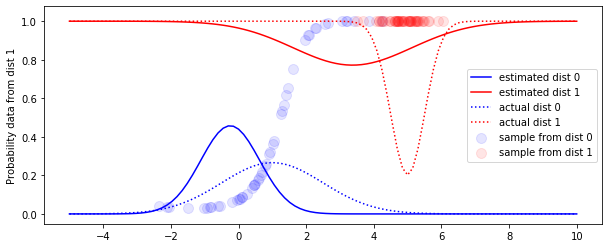

In [31]:
y = dists[1].pdf(x) / (dists[0].pdf(x) + dists[1].pdf(x))
plot_em(x, y, dists, actual_dists)

      actual  estimate
mu_0  1.00    -0.029
mu_1  5.00    4.069
sd_0  1.50    0.914
sd_1  0.50    1.158


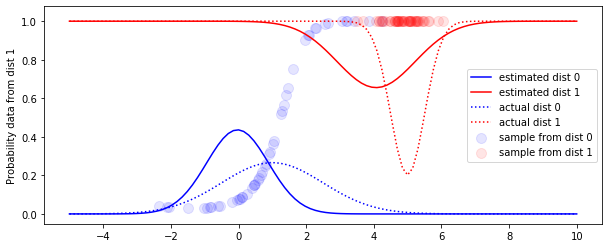

In [32]:
mus[0], sds[0] = weighted_stats(x, 1-y)
mus[1], sds[1] = weighted_stats(x, y)
dists = [scs.norm(mu, sd) for mu, sd in zip(mus, sds)]

plot_em(x, y, dists, actual_dists)
print_stats(actual_mus, actual_sds, mus, sds)

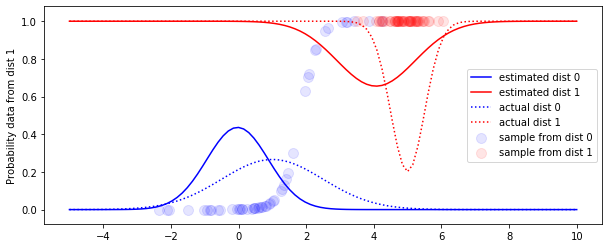

In [33]:
y = dists[1].pdf(x) / (dists[0].pdf(x) + dists[1].pdf(x))
plot_em(x, y, dists, actual_dists)

      actual  estimate
mu_0  1.00    0.185
mu_1  5.00    4.433
sd_0  1.50    1.001
sd_1  0.50    0.906


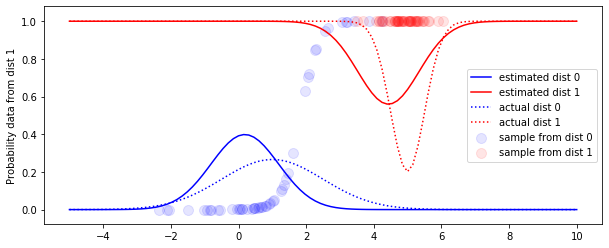

In [34]:
mus[0], sds[0] = weighted_stats(x, 1-y)
mus[1], sds[1] = weighted_stats(x, y)
dists = [scs.norm(mu, sd) for mu, sd in zip(mus, sds)]

plot_em(x, y, dists, actual_dists)
print_stats(actual_mus, actual_sds, mus, sds)

In [35]:
for i in range(100):
    y = dists[1].pdf(x) / (dists[0].pdf(x) + dists[1].pdf(x))
    mus[0], sds[0] = weighted_stats(x, 1-y)
    mus[1], sds[1] = weighted_stats(x, y)
    dists = [scs.norm(mu, sd) for mu, sd in zip(mus, sds)]

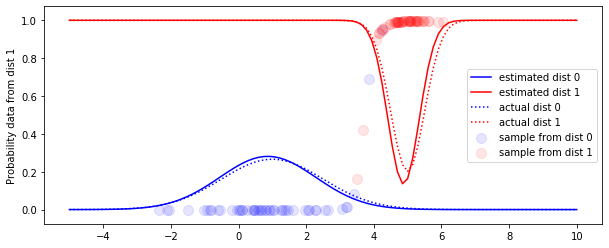

In [36]:
plot_em(x, y, dists, actual_dists)
